# CA2(1) Solve the optimization problem using GD, SGD, SVRG and SAG

In [1]:
"""
 * \file
     *  MLoN CA2 Logistic Ridge Regression_part(1)
 * \author
 *  Wenqing Yan <wenqing.yan@it.uu.se>
 * Function list: 
                 GD (2 methods): #fixed iteration without using the stopping criterion; #tick lib;
                 SAG (3 methods): #sklearn.SDGClassfier; #sklearn.LogisticRegressionCV or sklearn.LogisticRegression; # tick lib
                 SDG (3 methods): the same as SAG;
                 SVRG (1 method): #tick.lib
 *penalty lamda: 1 for all
                 
"""

## Read the clean data
import pandas as pd
import numpy as np
import time

df = pd.read_csv('household_power_consumption.csv')

In [2]:
df.head(5)

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
0   0.374796   0.300719   0.376090   0.377593        0.0     0.0125   
1   0.478363   0.313669   0.336995   0.473029        0.0     0.0125   
2   0.479631   0.358273   0.326010   0.473029        0.0     0.0250   
3   0.480898   0.361151   0.340549   0.473029        0.0     0.0125   
4   0.325005   0.379856   0.403231   0.323651        0.0     0.0125   

   var7(t-1)   var1(t)  HighConsumption  
0   0.548387  0.478363                1  
1   0.516129  0.479631                1  
2   0.548387  0.480898                1  
3   0.548387  0.325005                1  
4   0.548387  0.311787                1

In [3]:
df.describe()

var1(t-1)     var2(t-1)     var3(t-1)     var4(t-1)     var5(t-1)  \
count  2.075258e+06  2.075258e+06  2.075258e+06  2.075258e+06  2.075258e+06   
mean   9.194415e-02  8.900326e-02  5.699470e-01  9.186223e-02  1.274913e-02   
std    9.511640e-02  8.058576e-02  1.040273e-01  9.162845e-02  6.948180e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.118414e-02  3.453237e-02  5.111470e-01  2.489627e-02  0.000000e+00   
50%    5.015390e-02  7.338129e-02  5.738288e-01  5.394191e-02  0.000000e+00   
75%    1.307261e-01  1.381295e-01  6.352181e-01  1.286307e-01  0.000000e+00   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

          var6(t-1)     var7(t-1)       var1(t)  HighConsumption  
count  2.075258e+06  2.075258e+06  2.075258e+06     2.075258e+06  
mean   1.623151e-02  2.083371e-01  9.194401e-02     2.498677e-01  
std    7.231840e-02  2.704574e-01  9.511620e-02     4.329364e-01  
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00  
25%    0.000000e+00  0.000000e+00  2.118414e-02     0.000000e+00  
50%    0.000000e+00  3.225806e-02  5.015390e-02     0.000000e+00  
75%    1.250000e-02  5.483871e-01  1.307261e-01     0.000000e+00  
max    1.000000e+00  1.000000e+00  1.000000e+00     1.000000e+00

In [4]:
values = df.values

X = df.iloc[:, 0:7].values
y = df.iloc[:, -1].values

In [5]:
# Split XY into training set and test set of equal size

from sklearn.model_selection import train_test_split
train, test = train_test_split(values, test_size = 0.3)

train_x, train_y = train[:, 0:7], train[:, -1]
test_x, test_y = test[:, :7], test[:, -1]

## GD Version 1 - in plain Numpy

In [6]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """
    y = y[:, np.newaxis]
    h = sigmoid(X @ theta)
    cost = (-y * np.log(h) - (1-y)*np.log(1-h)).mean()
    regCost= cost + Lambda * sum(theta**2)
    
    # compute gradient
    grad = (X.T @ (h - y)) / y.shape[0] + 2*Lambda*theta
    return regCost[0], grad

In [7]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
# Set regularization parameter lambda to 1
Lambda = 1
#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)
print("Gradient at initial theta (zeros):",grad)

Cost at initial theta (zeros): 0.6931471805599466
Gradient at initial theta (zeros): [[-0.00878068]
 [ 0.01493564]
 [ 0.15636747]
 [-0.00753657]
 [-0.00548385]
 [-0.00414032]
 [-0.00963651]]


In [8]:
# Take in numpy array X, y and theta and update theta by taking num_iters gradient steps with learning rate of alpha
# return theta and the list of the cost of theta during each iteration
def gradientDescent(X,y,alpha,num_iters,Lambda):
    J_history =[]
    theta = np.zeros((X.shape[1], 1))
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

def predict(X, theta, threshold):
    return sigmoid(X @ theta) >= threshold


theta , J_history = gradientDescent(X,y,0.03,100,1)
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 0.00479189]
 [-0.0070057 ]
 [-0.07500717]
 [ 0.00417212]
 [ 0.00278221]
 [ 0.00213187]
 [ 0.00573224]]


In [9]:
import matplotlib.pyplot as plt
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Loss Function Value")
plt.title("Cost function using GD")
plt.savefig('GDCostFuntion vs iteration.png')
plt.show()

<Figure size 640x480 with 1 Axes>

## GD Version2 - Packing Logistic Ridge Regression as Class

In [10]:
class LogisticRidgeRegression:
    def __init__(self, lr=0.01, num_iter=100000, lamda=1):
        self.lr = lr
        self.num_iter = num_iter
        self.lamda = lamda
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y, theta):
        y = y[:, np.newaxis]
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + self.lamda * sum(theta**2)
    
    def fit(self, X, y):
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = X @ self.theta
            h = self.__sigmoid(z)
            gradient = (X.T @ (h - y)) / y.shape[0] + 2*self.lamda * self.theta
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [11]:
clf = LogisticRidgeRegression(lr=0.1, num_iter=10, lamda=1)
%time clf.fit(train_x, train_y)

CPU times: user 1.44 s, sys: 228 ms, total: 1.67 s
Wall time: 453 ms


In [12]:
# Set up the determine threshold as 0.5
predictions = clf.predict(test_x, 0.5)
# Accuracy
(predictions == test_y).mean()

0.749499661086643

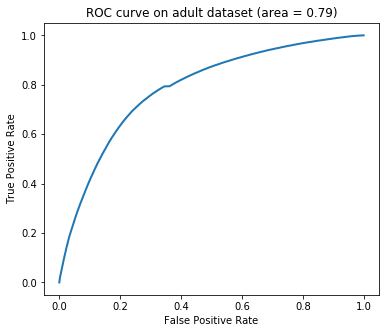

In [13]:
# Roc Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plotRoc(test_y, predictions):
    fpr, tpr, _ = roc_curve(test_y, predictions)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2)
    plt.title("ROC curve on adult dataset (area = {:.2f})".format(auc(fpr, tpr)))
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

preds = clf.predict_prob(test_x)
plotRoc(test_y, preds)
plt.savefig('ROC_GD.png')

## SDGClassifier_SGD

In [14]:
from sklearn.linear_model import SGDClassifier
lamda = 1
# Select the model with the best scoring
%time clf = SGDClassifier(loss='log', penalty="l2", alpha=lamda).fit(train_x, train_y)
#test The default scoring option used is ‘accuracy’
clf.score(test_x, test_y)

/Users/wenging/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


CPU times: user 1.85 s, sys: 51.6 ms, total: 1.9 s
Wall time: 1.93 s


0.7494386245578867

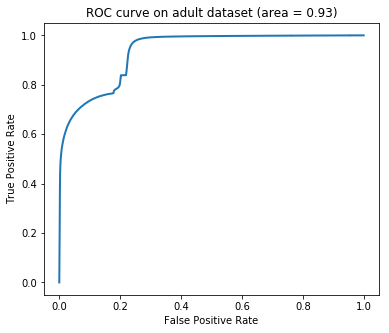

In [15]:
# Roc Curve 
preds = clf.predict_proba(test_x)    
plotRoc(test_y, preds[:,1])
plt.savefig('ROC_SGD.png')

## SDGClassifier_SAG

In [16]:
from sklearn.linear_model import SGDClassifier
lamda = 1
# Select the model with the best scoring
%time clf = SGDClassifier(loss='log', penalty="l2", alpha=lamda, average=True).fit(train_x, train_y)
#test The default scoring option used is ‘accuracy’
clf.predict(test_x)
clf.score(test_x, test_y)

/Users/wenging/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


CPU times: user 2.11 s, sys: 71.9 ms, total: 2.18 s
Wall time: 2.11 s


0.7494386245578867

## LogisticRegressionCV_SAG

In [17]:
lamda = range(1, 10)
cs = [1/x for x in lamda]
from sklearn.linear_model import LogisticRegressionCV
# Select the model with the best scoring
%time clf = LogisticRegressionCV(cv = 5, Cs = cs, solver='sag').fit(train_x, train_y)
#test The default scoring option used is ‘accuracy’
clf.predict(test_x)
clf.score(test_x, test_y)

CPU times: user 3min 4s, sys: 1.61 s, total: 3min 6s
Wall time: 3min 2s


0.9622697878820003

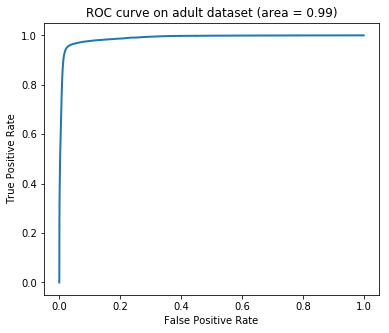

In [18]:
# Roc Curve    
preds = clf.predict_proba(test_x)    
plotRoc(test_y, preds[:,1])
plt.savefig('ROC_SAG.png')

## Tick lib_SVRG

/Users/wenging/anaconda3/lib/python3.6/site-packages/tick/preprocessing/utils.py:31: RuntimeWarning: Copying array of size (1452680, 7) to create a C-contiguous version of it
  'version of it' % str(X.shape), RuntimeWarning)


CPU times: user 22.9 s, sys: 123 ms, total: 23 s
Wall time: 23.1 s


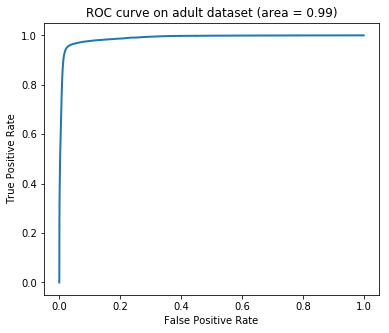

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tick.linear_model import LogisticRegression


learner = LogisticRegression(solver='svrg')
%time learner.fit(train_x, train_y)


preds = clf.predict_proba(test_x)    
plotRoc(test_y, preds[:,1])
plt.savefig('ROC_SVRG.png')